# Sequential Neural Network
In this notebook I will train a Sequential Neural Network for classification of erosion.

In [ ]:
# Adjust the frac parameter for loess smoothing
# to control the degree of smoothing applied to the scan data.
labeled_dir = "../../scandata/slices loess frac=0.18_labeled"

masks_path = "../stratified_k-fold_masks.npy"

DetectionNotClassification = False  # Set to True to replace all non-zero labels with 1

Libraries used:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.metrics import AUC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

from sklearn.preprocessing import StandardScaler

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Use GPU if available
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)


2025-08-18 16:28:48.716332: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-18 16:28:48.924131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755534528.989049   44364 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755534529.007169   44364 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755534529.158411   44364 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Num GPUs Available: 1
TensorFlow version: 2.19.0


In [3]:
all_masks = np.load(masks_path, allow_pickle=True)

# List all labeled files
labeled_files = [f for f in os.listdir(labeled_dir) if f.endswith("_slices_labeled.npy")]
selected_files = labeled_files  # Use all files by default

In [4]:
# Load features (X) and labels (y) for each file
all_X = []
all_y = []
for labeled_file in selected_files:
    data = np.load(os.path.join(labeled_dir, labeled_file), allow_pickle=True).item()
    slices = data["slices"]  # shape: (num_slices, max_points, 3)
    labels = data["labels"]  # shape: (num_slices,)

    X = slices[:, :, 2]  # shape: (num_slices, max_points)
    if DetectionNotClassification:
        y = (labels != 0).astype(int)
    else:
        y = labels  # keep original labels for multiclass
    all_X.append(X)
    all_y.append(y)

I0000 00:00:1755534543.229068   44364 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/50


I0000 00:00:1755534545.266366   44631 service.cc:152] XLA service 0x777768022bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755534545.266399   44631 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-08-18 16:29:05.352633: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1755534545.542602   44631 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.2969 - auc: 0.4733 - loss: 1.5821 - precision: 0.3023 - recall: 0.2031

I0000 00:00:1755534547.233900   44631 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 790ms/step - accuracy: 0.4654 - auc: 0.6570 - loss: 1.2818 - precision: 0.5036 - recall: 0.3786 - val_accuracy: 0.7069 - val_auc: 0.8306 - val_loss: 2.5814 - val_precision: 0.7069 - val_recall: 0.7069
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7282 - auc: 0.8755 - loss: 0.8668 - precision: 0.7630 - recall: 0.6638 - val_accuracy: 0.7586 - val_auc: 0.8709 - val_loss: 1.6729 - val_precision: 0.7719 - val_recall: 0.7586
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7673 - auc: 0.9130 - loss: 0.7801 - precision: 0.8335 - recall: 0.7117 - val_accuracy: 0.7759 - val_auc: 0.8966 - val_loss: 1.3248 - val_precision: 0.7759 - val_recall: 0.7759
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7393 - auc: 0.8933 - loss: 0.8236 - precision: 0.7752 - recall: 0.6440 - val_accuracy: 0.7759 - val_auc: 0.9151 - val_loss: 1.0800 - val_precision: 0.7759 - val_recall: 0.7759
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc

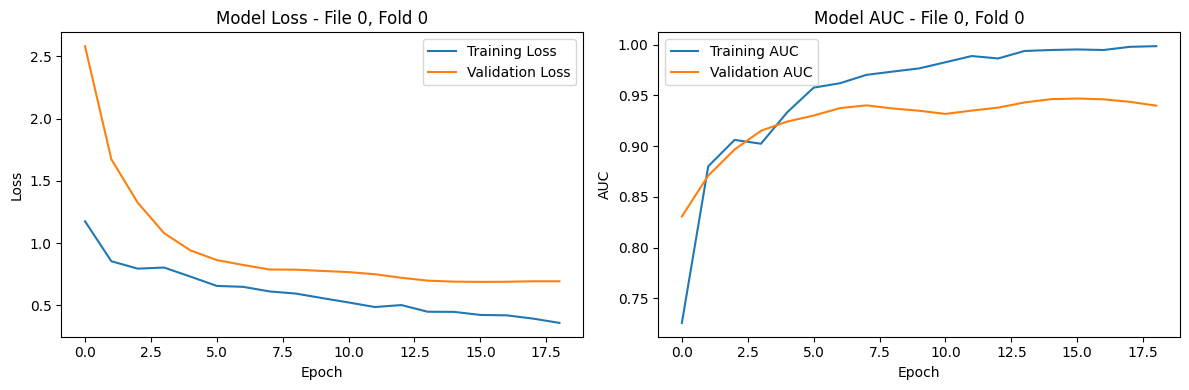

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 702ms/step - accuracy: 0.4120 - auc: 0.5809 - loss: 1.5183 - precision: 0.4338 - recall: 0.3325 - val_accuracy: 0.5345 - val_auc: 0.7134 - val_loss: 4.0152 - val_precision: 0.5439 - val_recall: 0.5345
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6775 - auc: 0.8173 - loss: 1.0058 - precision: 0.7299 - recall: 0.6122 - val_accuracy: 0.6724 - val_auc: 0.7449 - val_loss: 3.0092 - val_precision: 0.6667 - val_recall: 0.6207
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7084 - auc: 0.8488 - loss: 0.9436 - precision: 0.7854 - recall: 0.6127 - val_accuracy: 0.6897 - val_auc: 0.7661 - val_loss: 2.4471 - val_precision: 0.7222 - val_recall: 0.6724
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7692 - auc: 0.9016 - loss: 0.8234 - precision: 0.8137 - recall: 0.6757 - val_accuracy: 0.7069 - val_auc: 0.7774 - val_loss: 2.0637 - val_precision: 0.7273 - val_recall: 0.6897
Epoc

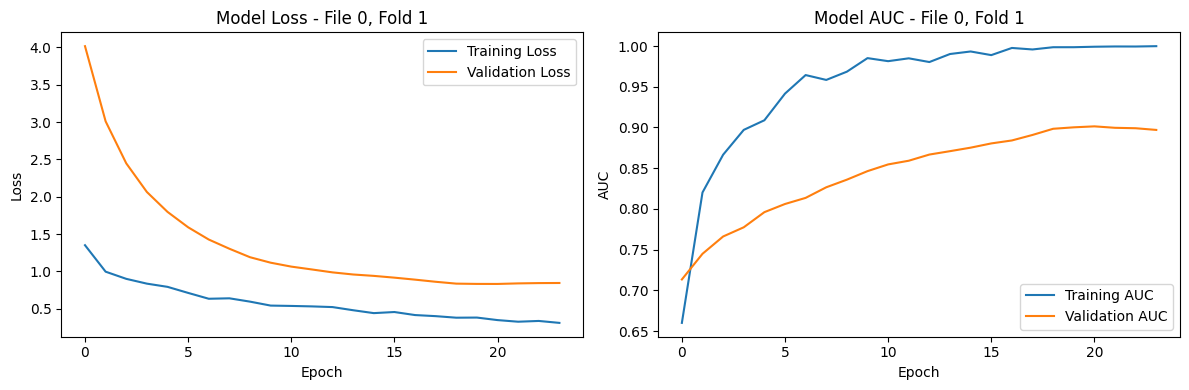

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 728ms/step - accuracy: 0.5181 - auc: 0.7001 - loss: 1.2812 - precision: 0.5393 - recall: 0.4587 - val_accuracy: 0.6724 - val_auc: 0.7719 - val_loss: 2.3856 - val_precision: 0.6724 - val_recall: 0.6724
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6050 - auc: 0.8350 - loss: 0.9277 - precision: 0.6471 - recall: 0.5380 - val_accuracy: 0.6897 - val_auc: 0.8048 - val_loss: 2.0871 - val_precision: 0.6897 - val_recall: 0.6897
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7010 - auc: 0.8756 - loss: 0.8464 - precision: 0.7291 - recall: 0.6485 - val_accuracy: 0.6724 - val_auc: 0.8283 - val_loss: 1.6678 - val_precision: 0.6724 - val_recall: 0.6724
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7872 - auc: 0.9207 - loss: 0.7389 - precision: 0.8306 - recall: 0.7294 - val_accuracy: 0.6724 - val_auc: 0.8605 - val_loss: 1.2841 - val_precision: 0.6964 - val_recall: 0.6724
Epoc

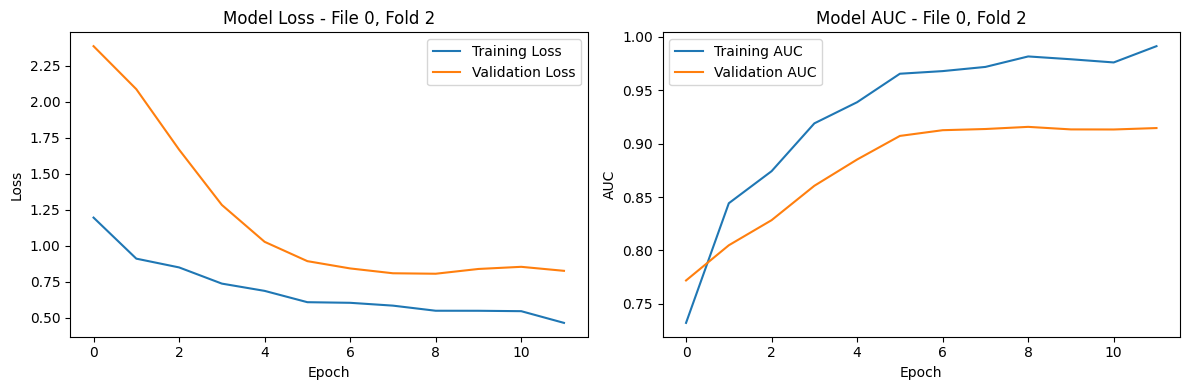

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7778594d2660> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 698ms/step - accuracy: 0.4394 - auc: 0.6525 - loss: 1.3777 - precision: 0.4709 - recall: 0.3667 - val_accuracy: 0.6897 - val_auc: 0.8681 - val_loss: 1.4370 - val_

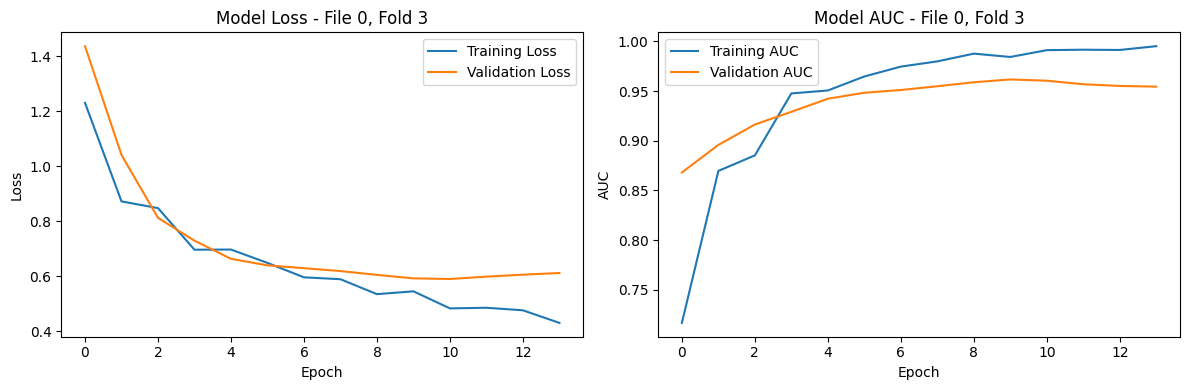

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 735ms/step - accuracy: 0.3879 - auc: 0.6008 - loss: 1.4305 - precision: 0.3835 - recall: 0.3013 - val_accuracy: 0.6034 - val_auc: 0.7380 - val_loss: 6.1096 - val_precision: 0.6140 - val_recall: 0.6034
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6751 - auc: 0.8293 - loss: 0.9777 - precision: 0.7295 - recall: 0.5892 - val_accuracy: 0.6207 - val_auc: 0.7615 - val_loss: 3.9082 - val_precision: 0.6207 - val_recall: 0.6207
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6718 - auc: 0.8603 - loss: 0.9058 - precision: 0.7401 - recall: 0.6052 - val_accuracy: 0.6034 - val_auc: 0.7903 - val_loss: 2.9068 - val_precision: 0.6140 - val_recall: 0.6034
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7593 - auc: 0.9078 - loss: 0.7962 - precision: 0.8083 - recall: 0.6707 - val_accuracy: 0.6379 - val_auc: 0.8102 - val_loss: 2.2880 - val_precision: 0.6379 - val_recall: 0.6379
Epoc

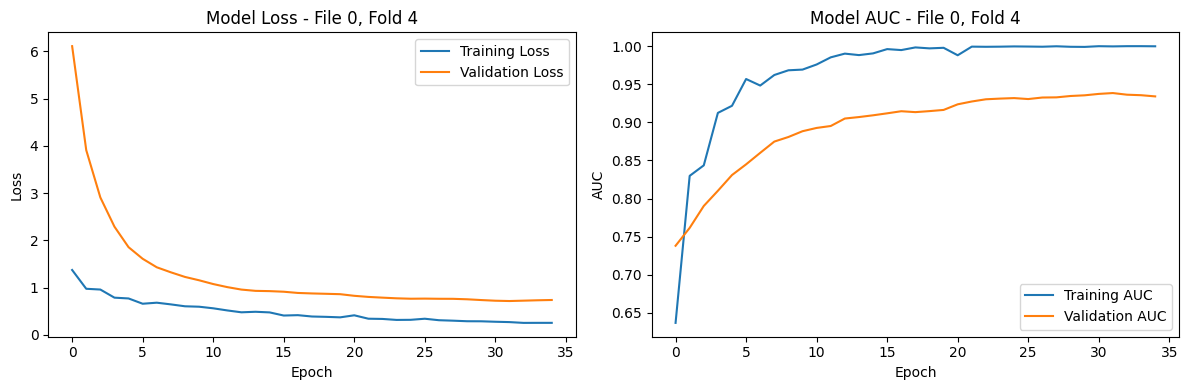

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3608 - auc: 0.4904 - loss: 1.5650 - precision: 0.3291 - recall: 0.2022 - val_accuracy: 0.4773 - val_auc: 0.5820 - val_loss: 4.1125 - val_precision: 0.4773 - val_recall: 0.4773
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5301 - auc: 0.7099 - loss: 1.2543 - precision: 0.5987 - recall: 0.4038 - val_accuracy: 0.4318 - val_auc: 0.6105 - val_loss: 3.7620 - val_precision: 0.4318 - val_recall: 0.4318
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5495 - auc: 0.7314 - loss: 1.1665 - precision: 0.6487 - recall: 0.4415 - val_accuracy: 0.4318 - val_auc: 0.6024 - val_loss: 3.4151 - val_precision: 0.4186 - val_recall: 0.4091
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6984 - auc: 0.8242 - loss: 1.0089 - precision: 0.7611 - recall: 0.4863 - val_accuracy: 0.5227 - val_auc: 0.6366 - val_loss: 2.8218 - val_precision: 0.5227 - val_recall: 0.5227
Epoch 5

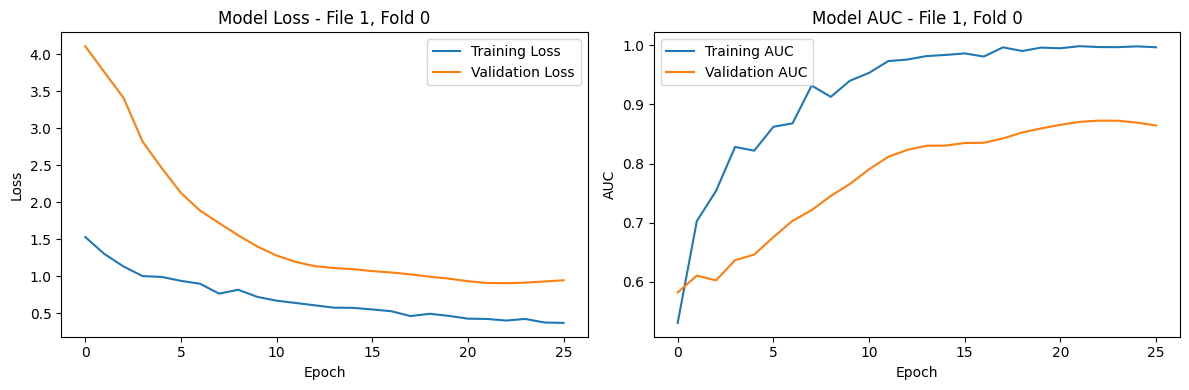

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3897 - auc: 0.5438 - loss: 1.5165 - precision: 0.4005 - recall: 0.2724 - val_accuracy: 0.5116 - val_auc: 0.6082 - val_loss: 4.4649 - val_precision: 0.5238 - val_recall: 0.5116
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4947 - auc: 0.7207 - loss: 1.2194 - precision: 0.5718 - recall: 0.3541 - val_accuracy: 0.6279 - val_auc: 0.7075 - val_loss: 3.3652 - val_precision: 0.6190 - val_recall: 0.6047
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5739 - auc: 0.7546 - loss: 1.1114 - precision: 0.6746 - recall: 0.3731 - val_accuracy: 0.6047 - val_auc: 0.7109 - val_loss: 2.8610 - val_precision: 0.5854 - val_recall: 0.5581
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6684 - auc: 0.8165 - loss: 1.0256 - precision: 0.7543 - recall: 0.4685 - val_accuracy: 0.6047 - val_auc: 0.7108 - val_loss: 2.5998 - val_precision: 0.5854 - val_recall: 0.5581
Epoch 5

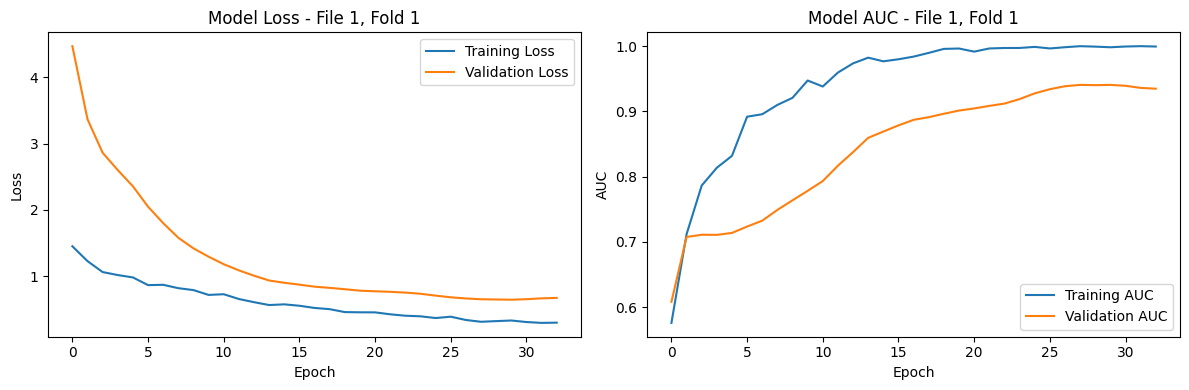

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3257 - auc: 0.5164 - loss: 1.5503 - precision: 0.2764 - recall: 0.1841 - val_accuracy: 0.4651 - val_auc: 0.6668 - val_loss: 3.8731 - val_precision: 0.4651 - val_recall: 0.4651
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4693 - auc: 0.6860 - loss: 1.2031 - precision: 0.4792 - recall: 0.3113 - val_accuracy: 0.5116 - val_auc: 0.7105 - val_loss: 2.9500 - val_precision: 0.5366 - val_recall: 0.5116
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5664 - auc: 0.7848 - loss: 1.0501 - precision: 0.6525 - recall: 0.3811 - val_accuracy: 0.5581 - val_auc: 0.7289 - val_loss: 2.1687 - val_precision: 0.5610 - val_recall: 0.5349
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5807 - auc: 0.7874 - loss: 1.0452 - precision: 0.6287 - recall: 0.4140 - val_accuracy: 0.6047 - val_auc: 0.7806 - val_loss: 1.6345 - val_precision: 0.5854 - val_recall: 0.5581
Epoch 5

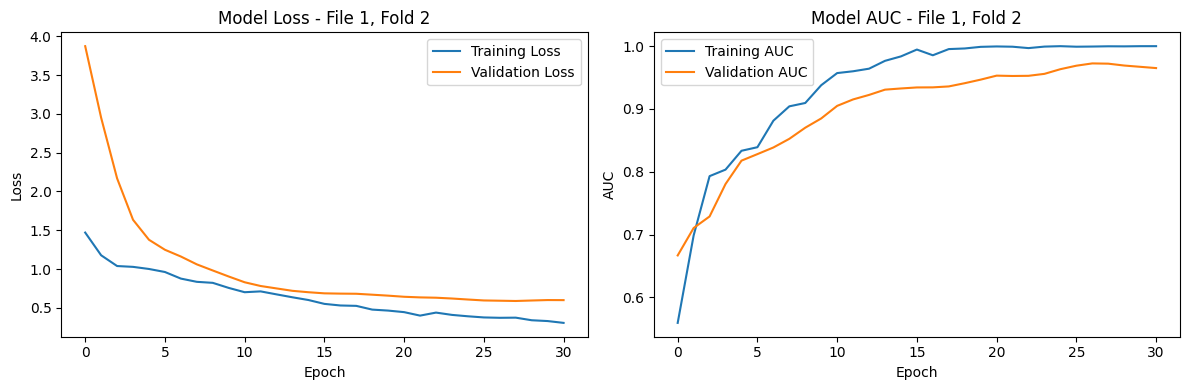

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4790 - auc: 0.7029 - loss: 1.1710 - precision: 0.4950 - recall: 0.3442 - val_accuracy: 0.6744 - val_auc: 0.8487 - val_loss: 1.5266 - val_precision: 0.6744 - val_recall: 0.6744
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6789 - auc: 0.8630 - loss: 0.8774 - precision: 0.7293 - recall: 0.5751 - val_accuracy: 0.7442 - val_auc: 0.8875 - val_loss: 1.1825 - val_precision: 0.7442 - val_recall: 0.7442
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7206 - auc: 0.8931 - loss: 0.8316 - precision: 0.7873 - recall: 0.5849 - val_accuracy: 0.7674 - val_auc: 0.9183 - val_loss: 0.9534 - val_precision: 0.7674 - val_recall: 0.7674
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7342 - auc: 0.9227 - loss: 0.7492 - precision: 0.7896 - recall: 0.6508 - val_accuracy: 0.7674 - val_auc: 0.9259 - val_loss: 0.8262 - val_precision: 0.7674 - val_recall: 0.7674
Epoch 5

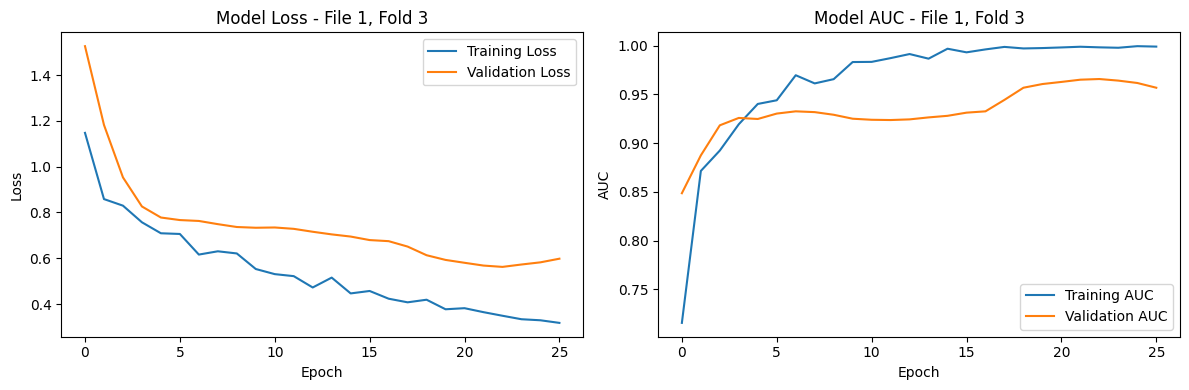

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6160 - auc: 0.8029 - loss: 1.0292 - precision: 0.7259 - recall: 0.4889 - val_accuracy: 0.6977 - val_auc: 0.9110 - val_loss: 0.8717 - val_precision: 0.7073 - val_recall: 0.6744
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8011 - auc: 0.9218 - loss: 0.7628 - precision: 0.8430 - recall: 0.6557 - val_accuracy: 0.7442 - val_auc: 0.9197 - val_loss: 0.8626 - val_precision: 0.7619 - val_recall: 0.7442
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8196 - auc: 0.9342 - loss: 0.7191 - precision: 0.8749 - recall: 0.6915 - val_accuracy: 0.7907 - val_auc: 0.9329 - val_loss: 0.7362 - val_precision: 0.8095 - val_recall: 0.7907
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8292 - auc: 0.9488 - loss: 0.6573 - precision: 0.8659 - recall: 0.7565 - val_accuracy: 0.8140 - val_auc: 0.9435 - val_loss: 0.6569 - val_precision: 0.8500 - val_recall: 0.7907
Epoch 5

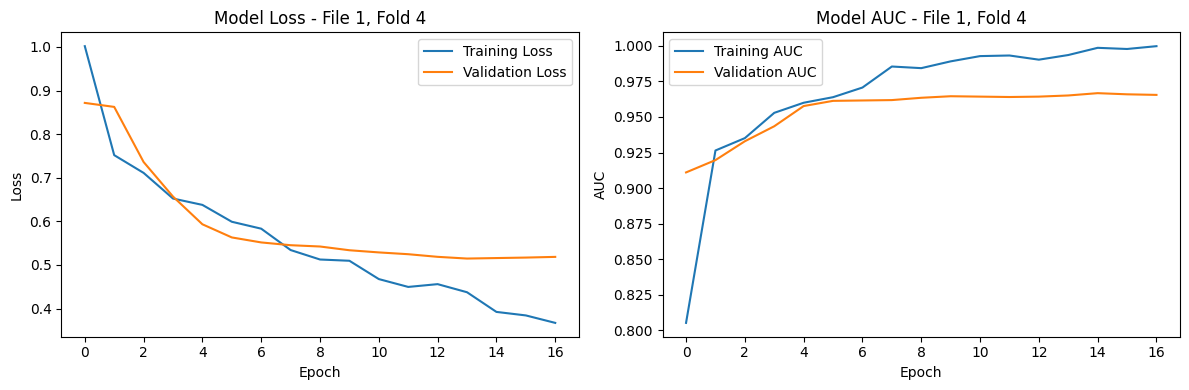

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5798 - auc: 0.7666 - loss: 1.0986 - precision: 0.6362 - recall: 0.4899 - val_accuracy: 0.4490 - val_auc: 0.6520 - val_loss: 4.7562 - val_precision: 0.4490 - val_recall: 0.4490
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7453 - auc: 0.9082 - loss: 0.7522 - precision: 0.8416 - recall: 0.6152 - val_accuracy: 0.5918 - val_auc: 0.7415 - val_loss: 3.2992 - val_precision: 0.5918 - val_recall: 0.5918
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8253 - auc: 0.9308 - loss: 0.6851 - precision: 0.8695 - recall: 0.7214 - val_accuracy: 0.6122 - val_auc: 0.7620 - val_loss: 2.4841 - val_precision: 0.6250 - val_recall: 0.6122
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8385 - auc: 0.9480 - loss: 0.6550 - precision: 0.8896 - recall: 0.7362 - val_accuracy: 0.6327 - val_auc: 0.7774 - val_loss: 2.2771 - val_precision: 0.6250 - val_recall: 0.6122
Epoch 5

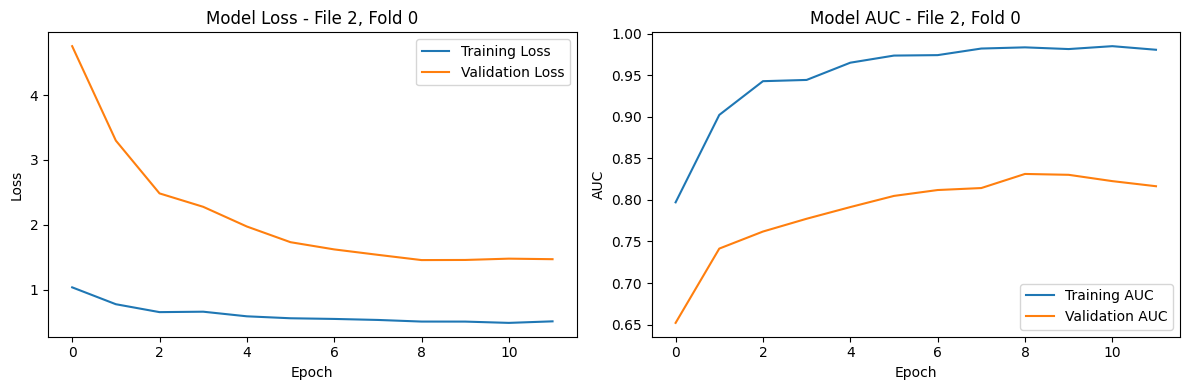

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 704ms/step - accuracy: 0.5013 - auc: 0.6767 - loss: 1.2469 - precision: 0.5781 - recall: 0.4100 - val_accuracy: 0.6735 - val_auc: 0.7632 - val_loss: 3.1665 - val_precision: 0.6735 - val_recall: 0.6735
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6989 - auc: 0.8573 - loss: 0.9065 - precision: 0.8154 - recall: 0.5837 - val_accuracy: 0.6735 - val_auc: 0.8148 - val_loss: 2.3901 - val_precision: 0.6735 - val_recall: 0.6735
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7567 - auc: 0.9108 - loss: 0.7735 - precision: 0.8241 - recall: 0.6891 - val_accuracy: 0.6939 - val_auc: 0.8709 - val_loss: 1.5728 - val_precision: 0.6939 - val_recall: 0.6939
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8063 - auc: 0.9166 - loss: 0.7521 - precision: 0.8504 - recall: 0.7313 - val_accuracy: 0.6939 - val_auc: 0.8919 - val_loss: 1.2416 - val_precision: 0.6939 - val_recall: 0.6939
Epoc

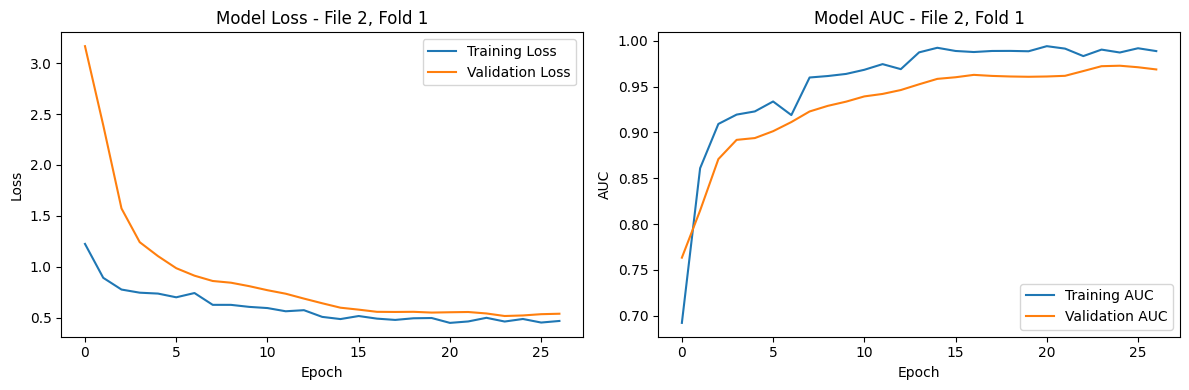

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 762ms/step - accuracy: 0.3518 - auc: 0.5537 - loss: 1.4380 - precision: 0.3817 - recall: 0.2646 - val_accuracy: 0.5714 - val_auc: 0.7725 - val_loss: 3.4850 - val_precision: 0.5714 - val_recall: 0.5714
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6133 - auc: 0.8121 - loss: 0.9807 - precision: 0.7068 - recall: 0.5229 - val_accuracy: 0.5918 - val_auc: 0.7735 - val_loss: 2.5770 - val_precision: 0.5918 - val_recall: 0.5918
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6064 - auc: 0.8318 - loss: 0.9382 - precision: 0.7168 - recall: 0.5274 - val_accuracy: 0.6122 - val_auc: 0.8023 - val_loss: 2.1711 - val_precision: 0.6122 - val_recall: 0.6122
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6964 - auc: 0.8652 - loss: 0.8718 - precision: 0.7842 - recall: 0.5915 - val_accuracy: 0.6327 - val_auc: 0.8104 - val_loss: 1.7002 - val_precision: 0.6327 - val_recall: 0.6327
Epoc

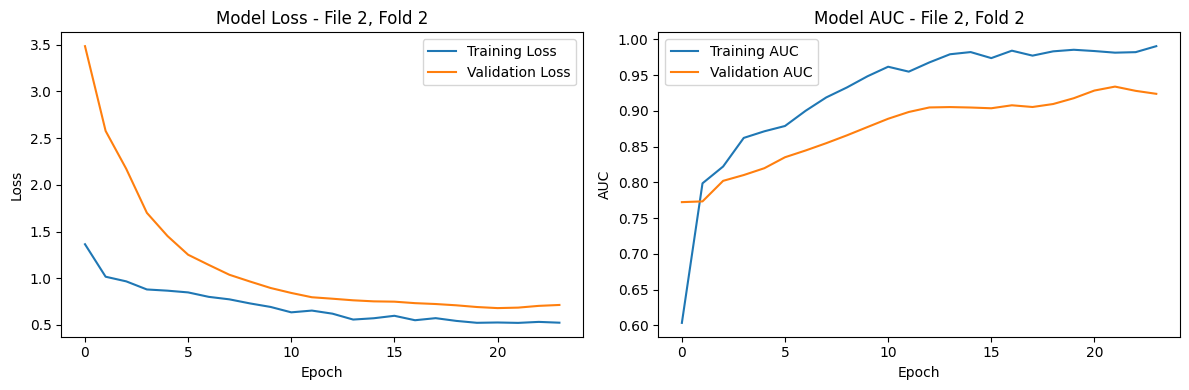

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 700ms/step - accuracy: 0.2833 - auc: 0.4767 - loss: 1.6513 - precision: 0.3343 - recall: 0.2353 - val_accuracy: 0.6531 - val_auc: 0.8008 - val_loss: 2.6611 - val_precision: 0.6531 - val_recall: 0.6531
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5434 - auc: 0.7174 - loss: 1.1795 - precision: 0.5523 - recall: 0.4256 - val_accuracy: 0.6735 - val_auc: 0.8207 - val_loss: 2.2702 - val_precision: 0.6735 - val_recall: 0.6735
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6203 - auc: 0.8059 - loss: 1.0033 - precision: 0.6984 - recall: 0.4949 - val_accuracy: 0.6735 - val_auc: 0.8484 - val_loss: 1.8615 - val_precision: 0.6735 - val_recall: 0.6735
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6036 - auc: 0.7953 - loss: 1.0141 - precision: 0.6779 - recall: 0.4502 - val_accuracy: 0.6735 - val_auc: 0.8549 - val_loss: 1.5344 - val_precision: 0.6735 - val_recall: 0.6735
Epoc

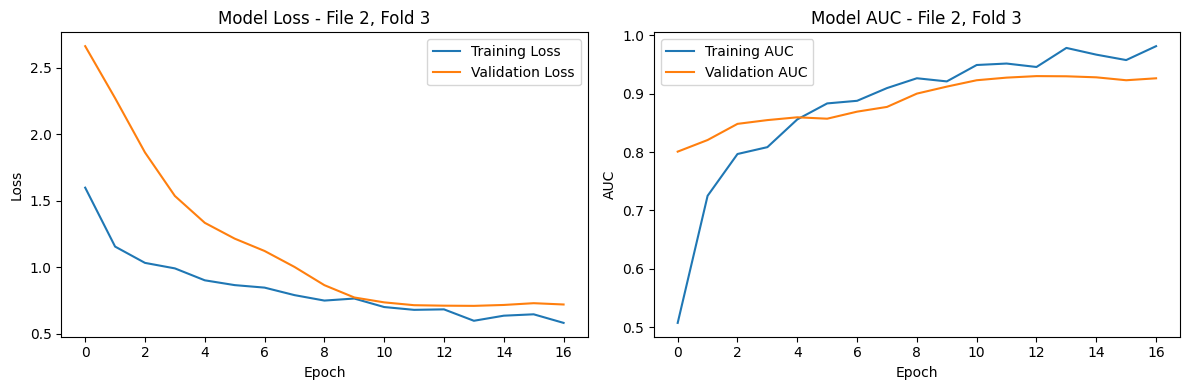

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 761ms/step - accuracy: 0.5398 - auc: 0.6823 - loss: 1.2518 - precision: 0.5564 - recall: 0.4235 - val_accuracy: 0.7347 - val_auc: 0.8356 - val_loss: 1.7981 - val_precision: 0.7347 - val_recall: 0.7347
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7179 - auc: 0.8872 - loss: 0.8250 - precision: 0.7764 - recall: 0.6296 - val_accuracy: 0.7347 - val_auc: 0.8954 - val_loss: 1.1629 - val_precision: 0.7347 - val_recall: 0.7347
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6973 - auc: 0.8807 - loss: 0.8217 - precision: 0.7217 - recall: 0.6161 - val_accuracy: 0.7347 - val_auc: 0.9056 - val_loss: 0.9110 - val_precision: 0.7292 - val_recall: 0.7143
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7707 - auc: 0.9288 - loss: 0.7182 - precision: 0.8212 - recall: 0.7102 - val_accuracy: 0.7755 - val_auc: 0.9367 - val_loss: 0.7839 - val_precision: 0.7708 - val_recall: 0.7551
Epoc

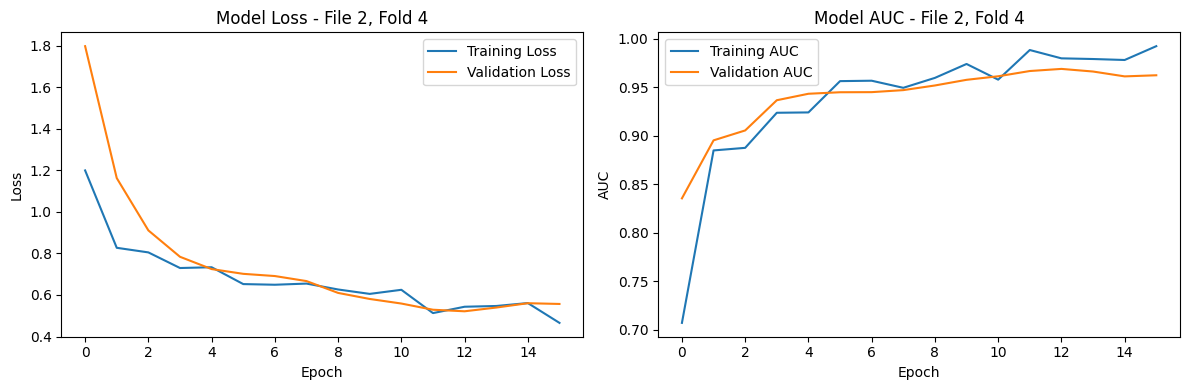

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 851ms/step - accuracy: 0.4170 - auc: 0.6377 - loss: 1.3645 - precision: 0.4864 - recall: 0.3508 - val_accuracy: 0.5672 - val_auc: 0.7133 - val_loss: 2.7995 - val_precision: 0.5758 - val_recall: 0.5672
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6782 - auc: 0.8544 - loss: 0.8767 - precision: 0.7422 - recall: 0.6185 - val_accuracy: 0.5821 - val_auc: 0.7776 - val_loss: 1.7898 - val_precision: 0.6032 - val_recall: 0.5672
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7370 - auc: 0.8959 - loss: 0.7873 - precision: 0.7859 - recall: 0.6393 - val_accuracy: 0.5821 - val_auc: 0.8181 - val_loss: 1.3816 - val_precision: 0.5909 - val_recall: 0.5821
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7986 - auc: 0.9335 - loss: 0.6980 - precision: 0.8570 - recall: 0.7051 - val_accuracy: 0.7164 - val_auc: 0.8588 - val_loss: 1.0523 - val_precision: 0.7231 - val_recall: 0.7015
Epoc

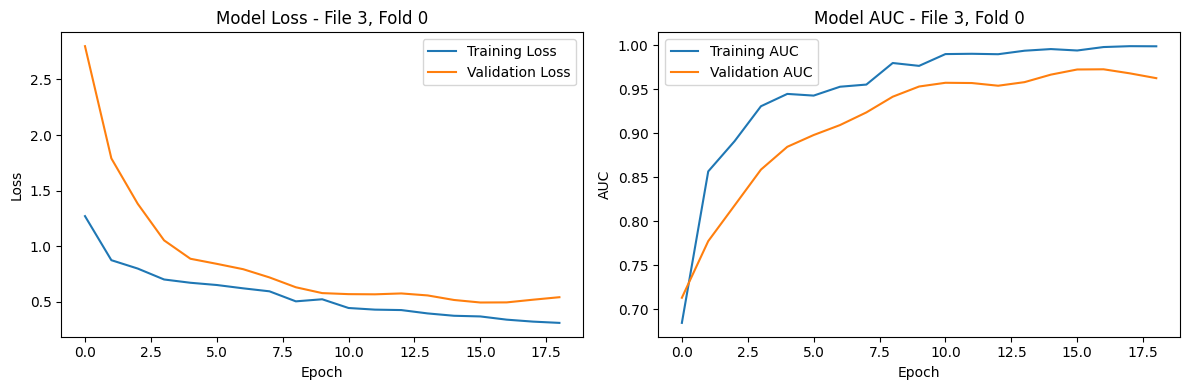

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 641ms/step - accuracy: 0.4425 - auc: 0.6001 - loss: 1.3732 - precision: 0.4450 - recall: 0.2916 - val_accuracy: 0.5522 - val_auc: 0.6971 - val_loss: 2.8689 - val_precision: 0.5522 - val_recall: 0.5522
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5117 - auc: 0.6874 - loss: 1.2193 - precision: 0.5548 - recall: 0.3894 - val_accuracy: 0.5821 - val_auc: 0.7428 - val_loss: 1.9683 - val_precision: 0.5909 - val_recall: 0.5821
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5855 - auc: 0.7524 - loss: 1.0874 - precision: 0.6176 - recall: 0.4624 - val_accuracy: 0.6269 - val_auc: 0.7722 - val_loss: 1.5441 - val_precision: 0.6406 - val_recall: 0.6119
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6536 - auc: 0.8261 - loss: 0.9435 - precision: 0.7053 - recall: 0.5370 - val_accuracy: 0.6418 - val_auc: 0.8122 - val_loss: 1.2689 - val_precision: 0.6462 - val_recall: 0.6269
Epoc

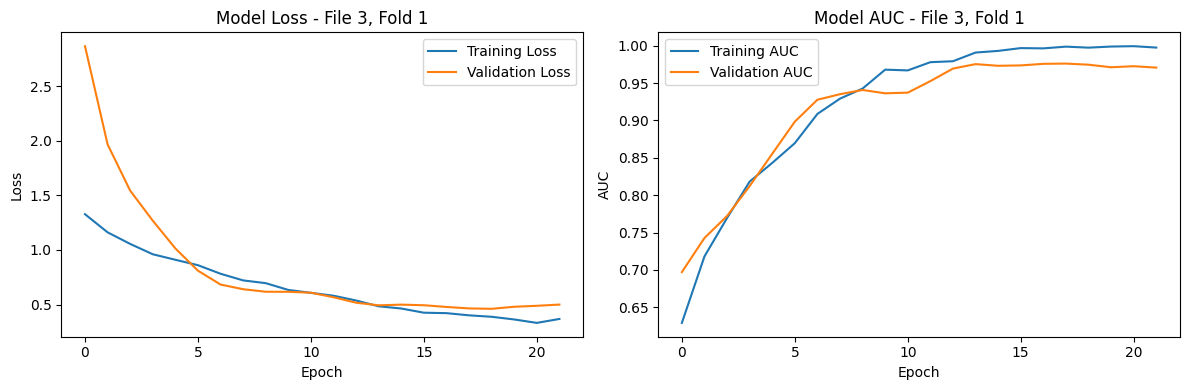

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 669ms/step - accuracy: 0.4080 - auc: 0.5889 - loss: 1.4037 - precision: 0.4423 - recall: 0.3109 - val_accuracy: 0.6418 - val_auc: 0.8110 - val_loss: 1.8235 - val_precision: 0.6515 - val_recall: 0.6418
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6027 - auc: 0.7833 - loss: 1.0214 - precision: 0.6585 - recall: 0.4563 - val_accuracy: 0.6716 - val_auc: 0.8554 - val_loss: 1.2330 - val_precision: 0.6667 - val_recall: 0.6269
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6492 - auc: 0.8303 - loss: 0.9308 - precision: 0.7372 - recall: 0.5114 - val_accuracy: 0.7015 - val_auc: 0.8927 - val_loss: 0.9020 - val_precision: 0.7188 - val_recall: 0.6866
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7745 - auc: 0.8965 - loss: 0.8020 - precision: 0.8117 - recall: 0.6243 - val_accuracy: 0.7015 - val_auc: 0.9178 - val_loss: 0.7232 - val_precision: 0.7302 - val_recall: 0.6866
Epoc

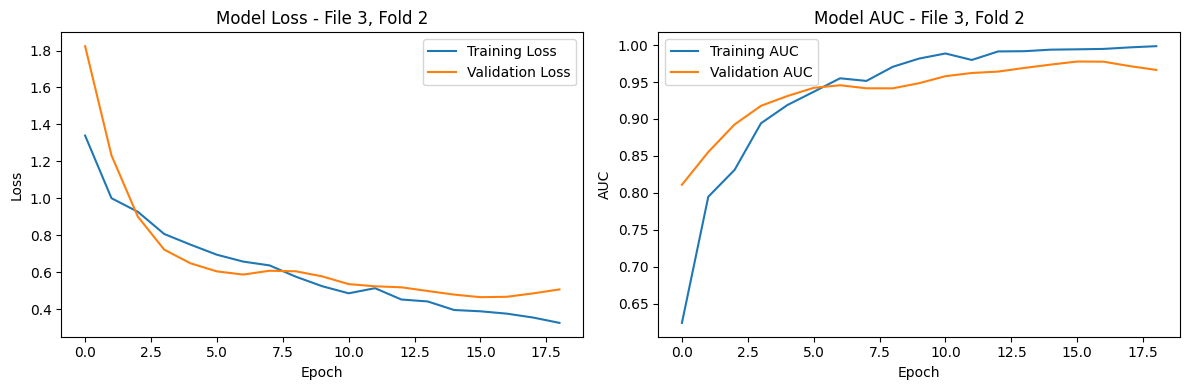

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 648ms/step - accuracy: 0.4618 - auc: 0.6313 - loss: 1.3892 - precision: 0.5026 - recall: 0.3462 - val_accuracy: 0.6567 - val_auc: 0.7639 - val_loss: 4.1820 - val_precision: 0.6667 - val_recall: 0.6567
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6522 - auc: 0.7985 - loss: 1.0298 - precision: 0.6929 - recall: 0.5195 - val_accuracy: 0.7015 - val_auc: 0.7983 - val_loss: 2.7528 - val_precision: 0.7121 - val_recall: 0.7015
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7288 - auc: 0.8577 - loss: 0.8866 - precision: 0.7720 - recall: 0.5438 - val_accuracy: 0.7015 - val_auc: 0.8176 - val_loss: 1.8349 - val_precision: 0.7077 - val_recall: 0.6866
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7615 - auc: 0.8935 - loss: 0.8114 - precision: 0.8429 - recall: 0.6314 - val_accuracy: 0.7910 - val_auc: 0.8675 - val_loss: 1.2191 - val_precision: 0.7812 - val_recall: 0.7463
Epoc

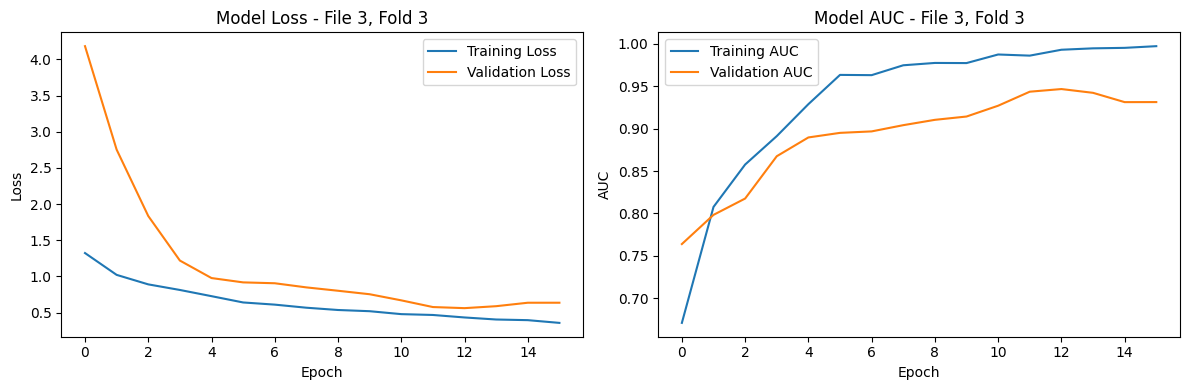

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 897ms/step - accuracy: 0.2592 - auc: 0.3710 - loss: 2.1159 - precision: 0.2421 - recall: 0.1928 - val_accuracy: 0.4091 - val_auc: 0.6196 - val_loss: 4.5652 - val_precision: 0.4091 - val_recall: 0.4091
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4157 - auc: 0.5914 - loss: 1.4493 - precision: 0.4884 - recall: 0.3148 - val_accuracy: 0.5758 - val_auc: 0.7126 - val_loss: 3.2331 - val_precision: 0.6271 - val_recall: 0.5606
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5329 - auc: 0.7205 - loss: 1.2256 - precision: 0.6197 - recall: 0.4227 - val_accuracy: 0.6212 - val_auc: 0.7426 - val_loss: 2.4402 - val_precision: 0.6667 - val_recall: 0.5758
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6283 - auc: 0.7499 - loss: 1.1598 - precision: 0.6886 - recall: 0.4925 - val_accuracy: 0.6515 - val_auc: 0.7664 - val_loss: 1.8775 - val_precision: 0.6833 - val_recall: 0.6212
Epoc

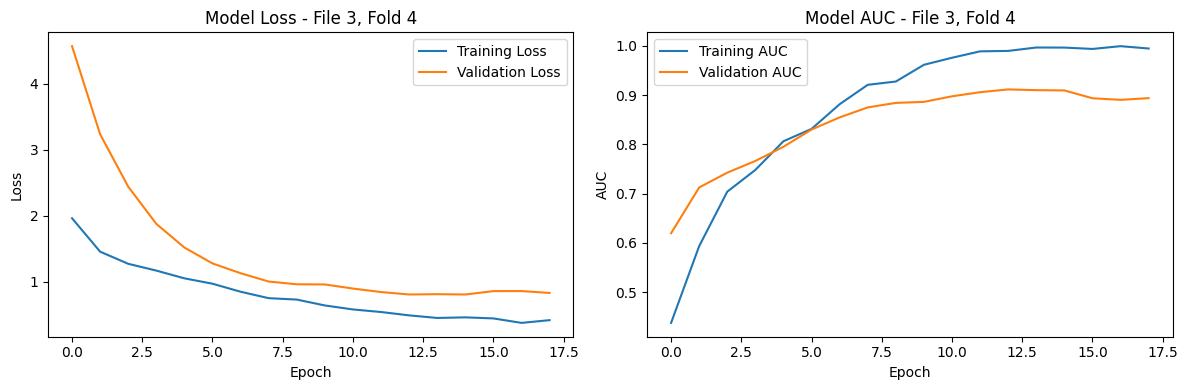

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 808ms/step - accuracy: 0.5070 - auc: 0.6973 - loss: 1.3120 - precision: 0.5389 - recall: 0.4369 - val_accuracy: 0.6418 - val_auc: 0.8094 - val_loss: 3.0632 - val_precision: 0.6615 - val_recall: 0.6418
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7218 - auc: 0.8583 - loss: 0.9328 - precision: 0.7623 - recall: 0.6182 - val_accuracy: 0.7463 - val_auc: 0.8697 - val_loss: 1.7766 - val_precision: 0.7576 - val_recall: 0.7463
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7275 - auc: 0.8689 - loss: 0.8722 - precision: 0.7841 - recall: 0.6546 - val_accuracy: 0.8060 - val_auc: 0.8863 - val_loss: 1.3048 - val_precision: 0.8000 - val_recall: 0.7761
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8090 - auc: 0.9126 - loss: 0.7871 - precision: 0.8485 - recall: 0.6693 - val_accuracy: 0.7761 - val_auc: 0.8954 - val_loss: 1.1150 - val_precision: 0.7761 - val_recall: 0.7761
Epoc

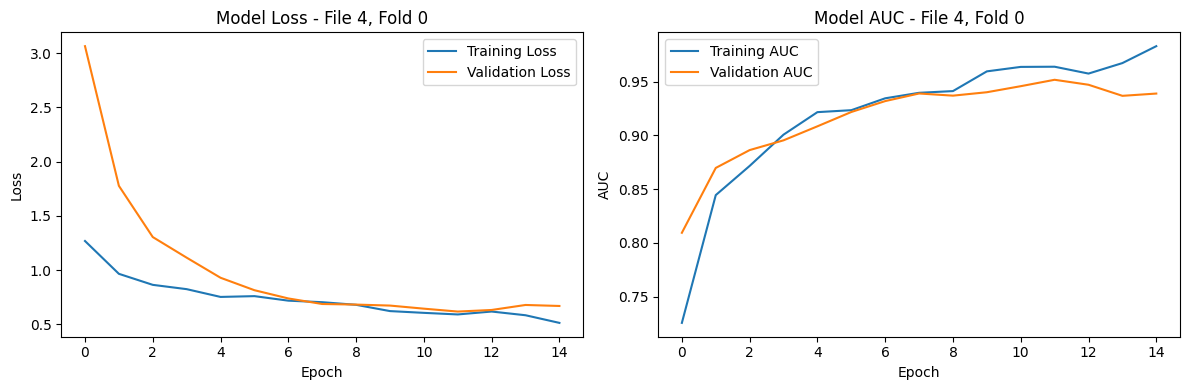

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 734ms/step - accuracy: 0.4297 - auc: 0.6440 - loss: 1.3227 - precision: 0.4883 - recall: 0.3465 - val_accuracy: 0.6667 - val_auc: 0.8390 - val_loss: 2.0204 - val_precision: 0.6615 - val_recall: 0.6515
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6190 - auc: 0.7797 - loss: 1.0997 - precision: 0.6958 - recall: 0.4742 - val_accuracy: 0.6364 - val_auc: 0.8658 - val_loss: 1.2527 - val_precision: 0.6667 - val_recall: 0.6364
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7042 - auc: 0.8402 - loss: 0.9685 - precision: 0.7926 - recall: 0.5527 - val_accuracy: 0.6515 - val_auc: 0.8856 - val_loss: 1.0028 - val_precision: 0.7000 - val_recall: 0.6364
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7452 - auc: 0.8864 - loss: 0.8767 - precision: 0.8158 - recall: 0.6273 - val_accuracy: 0.7273 - val_auc: 0.9079 - val_loss: 0.8729 - val_precision: 0.7627 - val_recall: 0.6818
Epoc

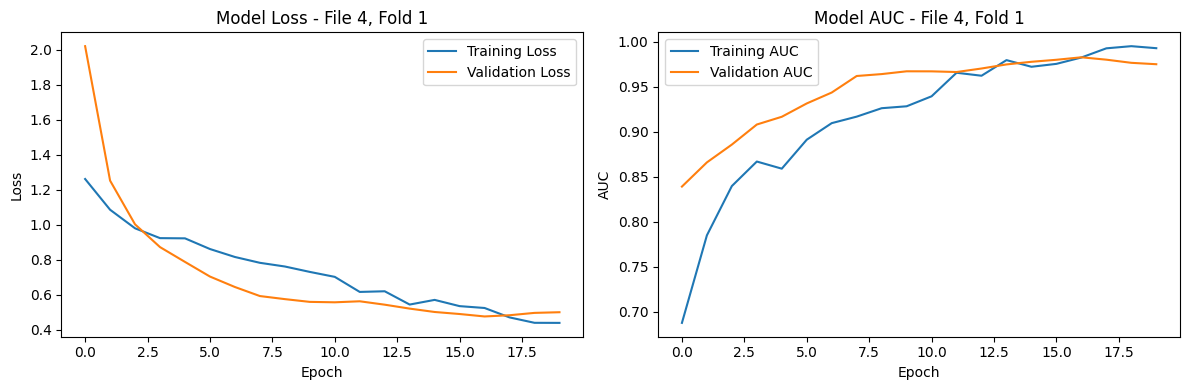

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 722ms/step - accuracy: 0.5071 - auc: 0.7116 - loss: 1.2421 - precision: 0.5802 - recall: 0.4233 - val_accuracy: 0.7121 - val_auc: 0.8651 - val_loss: 1.4015 - val_precision: 0.7121 - val_recall: 0.7121
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7197 - auc: 0.8695 - loss: 0.8684 - precision: 0.7995 - recall: 0.6217 - val_accuracy: 0.6970 - val_auc: 0.8937 - val_loss: 1.0570 - val_precision: 0.7541 - val_recall: 0.6970
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7451 - auc: 0.9135 - loss: 0.7633 - precision: 0.8135 - recall: 0.6486 - val_accuracy: 0.6818 - val_auc: 0.8806 - val_loss: 1.0638 - val_precision: 0.6923 - val_recall: 0.6818
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7630 - auc: 0.9279 - loss: 0.7230 - precision: 0.8354 - recall: 0.6800 - val_accuracy: 0.6667 - val_auc: 0.8719 - val_loss: 1.1066 - val_precision: 0.6825 - val_recall: 0.6515
Epoc

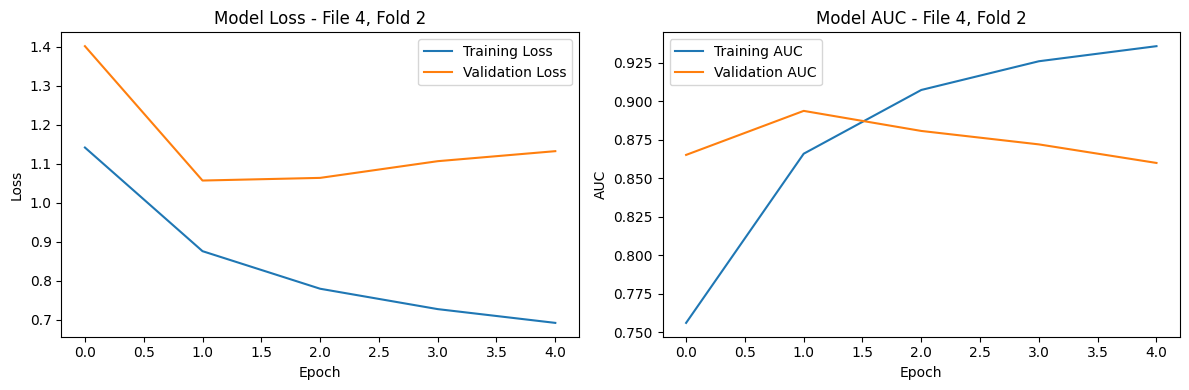

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 649ms/step - accuracy: 0.4561 - auc: 0.6158 - loss: 1.3686 - precision: 0.4584 - recall: 0.3286 - val_accuracy: 0.4848 - val_auc: 0.6496 - val_loss: 7.4377 - val_precision: 0.4848 - val_recall: 0.4848
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5532 - auc: 0.7326 - loss: 1.2090 - precision: 0.6109 - recall: 0.4641 - val_accuracy: 0.5758 - val_auc: 0.7013 - val_loss: 4.6332 - val_precision: 0.5846 - val_recall: 0.5758
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6737 - auc: 0.8431 - loss: 0.9513 - precision: 0.7395 - recall: 0.5621 - val_accuracy: 0.6061 - val_auc: 0.7596 - val_loss: 3.2979 - val_precision: 0.6061 - val_recall: 0.6061
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6946 - auc: 0.8688 - loss: 0.8955 - precision: 0.7773 - recall: 0.6242 - val_accuracy: 0.6515 - val_auc: 0.7817 - val_loss: 2.4766 - val_precision: 0.6515 - val_recall: 0.6515
Epoc

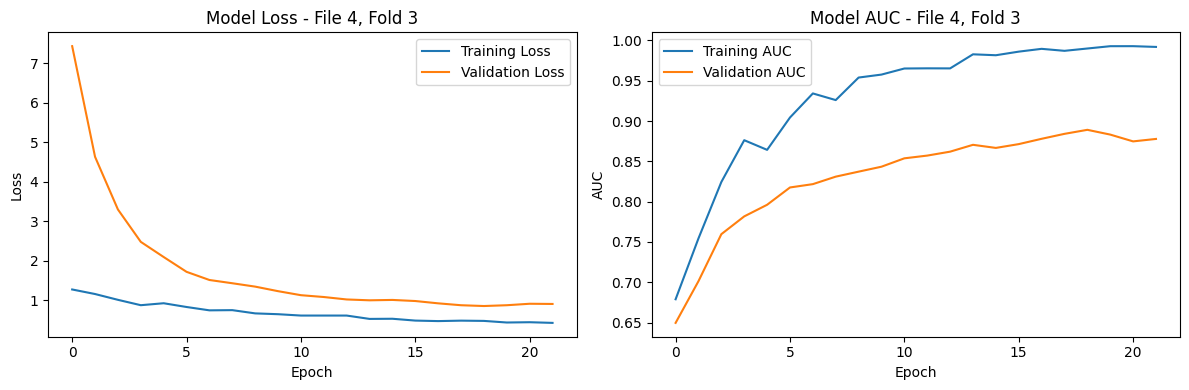

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 709ms/step - accuracy: 0.5480 - auc: 0.7275 - loss: 1.2380 - precision: 0.5696 - recall: 0.4885 - val_accuracy: 0.7727 - val_auc: 0.8710 - val_loss: 1.9165 - val_precision: 0.7727 - val_recall: 0.7727
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6893 - auc: 0.8662 - loss: 0.8682 - precision: 0.7196 - recall: 0.6028 - val_accuracy: 0.7576 - val_auc: 0.8903 - val_loss: 1.2459 - val_precision: 0.7937 - val_recall: 0.7576
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7645 - auc: 0.9098 - loss: 0.7758 - precision: 0.8086 - recall: 0.6778 - val_accuracy: 0.7879 - val_auc: 0.9087 - val_loss: 1.0227 - val_precision: 0.7879 - val_recall: 0.7879
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7629 - auc: 0.9037 - loss: 0.8083 - precision: 0.8333 - recall: 0.6808 - val_accuracy: 0.7879 - val_auc: 0.9300 - val_loss: 0.9055 - val_precision: 0.7969 - val_recall: 0.7727
Epoc

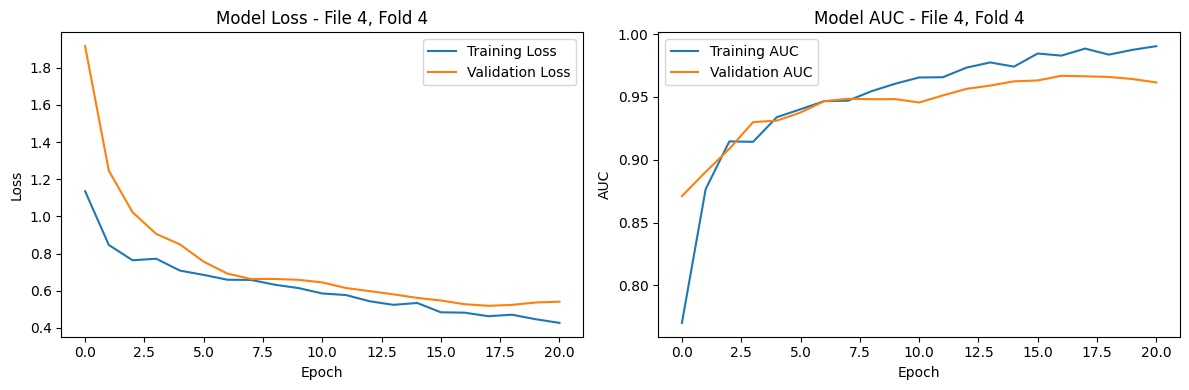

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


In [5]:
# Cross-validation using stratified k-Fold masks
n_folds = len(all_masks[0])
results = []

for file_idx, (X, y, masks) in enumerate(zip(all_X, all_y, all_masks)):
    file_results = []
    n_classes = len(np.unique(y))
    for fold_idx, val_mask in enumerate(masks):
        train_mask = ~val_mask
        X_train, y_train = X[train_mask], y[train_mask]
        X_val, y_val = X[val_mask], y[val_mask]

        # Scale using only the training data to prevent data leakage
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        # One-hot encode labels for keras if multiclass
        if len(np.unique(y_train)) > 2:
            # Create mapping from original labels to consecutive indices
            unique_labels = sorted(np.unique(y_train))
            label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
            idx_to_label = {idx: label for label, idx in label_to_idx.items()}
            
            # Map labels to consecutive indices
            y_train_mapped = np.array([label_to_idx[label] for label in y_train])
            y_val_mapped = np.array([label_to_idx[label] for label in y_val])
            
            n_classes = len(unique_labels)
            y_train_cat = keras.utils.to_categorical(y_train_mapped, num_classes=n_classes)
            y_val_cat = keras.utils.to_categorical(y_val_mapped, num_classes=n_classes)
            loss_fn = "categorical_crossentropy"
            activation = "softmax"
        else:
            y_train_cat = y_train
            y_val_cat = y_val
            n_classes = 2
            loss_fn = "binary_crossentropy"
            activation = "sigmoid"

        # Build model
        model = keras.Sequential()
        model.add(layers.Input(shape=(X_train.shape[1],)))
        model.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(negative_slope=0.01))
        model.add(layers.Dropout(0.3)) 
        model.add(layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.001)))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(negative_slope=0.01))
        model.add(layers.Dropout(0.3))  
        model.add(layers.Dense(n_classes if n_classes > 2 else 1, activation=activation))

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss=loss_fn,
            metrics=["accuracy", "precision", "recall", AUC(name='auc')]
        )

        # Train model with Early Stopping and Learning Rate Scheduling; store history
        history = model.fit(
            X_train_scaled, y_train_cat,
            epochs=50,
            batch_size=64,
            verbose=1,
            validation_data=(X_val_scaled, y_val_cat),
            callbacks = [
                EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
              # ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
            ]
        )

        # Plot learning curves for this fold
        plt.figure(figsize=(12, 4))
        
        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss - File {file_idx}, Fold {fold_idx}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        # Plot AUC
        plt.subplot(1, 2, 2)
        plt.plot(history.history['auc'], label='Training AUC')
        plt.plot(history.history['val_auc'], label='Validation AUC')
        plt.title(f'Model AUC - File {file_idx}, Fold {fold_idx}')
        plt.xlabel('Epoch')
        plt.ylabel('AUC')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

        # Predict
        if n_classes > 2:
            y_pred_proba = model.predict(X_val_scaled)
            y_pred_idx = np.argmax(y_pred_proba, axis=1)
            # Map back to original labels
            y_pred_class = np.array([idx_to_label[idx] for idx in y_pred_idx])
        else:
            y_pred_proba = model.predict(X_val_scaled).flatten()
            y_pred_class = (y_pred_proba > 0.5).astype(int)

        # Metrics
        avg = 'weighted'
        try:
            if n_classes > 2:
                roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr', average='weighted')
            else:
                roc_auc = roc_auc_score(y_val, y_pred_proba)
        except Exception:
            roc_auc = np.nan

        metrics = {
            "accuracy": accuracy_score(y_val, y_pred_class),
            "precision": precision_score(y_val, y_pred_class, average=avg, zero_division=0),
            "recall": recall_score(y_val, y_pred_class, average=avg, zero_division=0),
            "f1": f1_score(y_val, y_pred_class, average=avg, zero_division=0),
            "roc_auc": roc_auc,
            "confusion_matrix": confusion_matrix(y_val, y_pred_class, labels=sorted(np.unique(y))).tolist(),
            "fold": fold_idx,
            "file": selected_files[file_idx],
        }
        file_results.append(metrics)
    results.extend(file_results)

                                                    accuracy  precision  \
file                                                                      
221111_144114__binary_onlylines114378to117271 l...  0.820690   0.830126   
221111_144114__binary_onlylines145900to148050 l...  0.806237   0.831225   
221111_144114__binary_onlylines25660to28100 loe...  0.812245   0.825352   
221111_144114__binary_onlylines47178to50517 loe...  0.859114   0.861949   
221111_144114__binary_onlylines86841to90142 loe...  0.821800   0.852148   

                                                      recall        f1  \
file                                                                     
221111_144114__binary_onlylines114378to117271 l...  0.820690  0.821046   
221111_144114__binary_onlylines145900to148050 l...  0.806237  0.812802   
221111_144114__binary_onlylines25660to28100 loe...  0.812245  0.804584   
221111_144114__binary_onlylines47178to50517 loe...  0.859114  0.855835   
221111_144114__binary_onlyline

/tmp/ipykernel_44364/1605691262.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


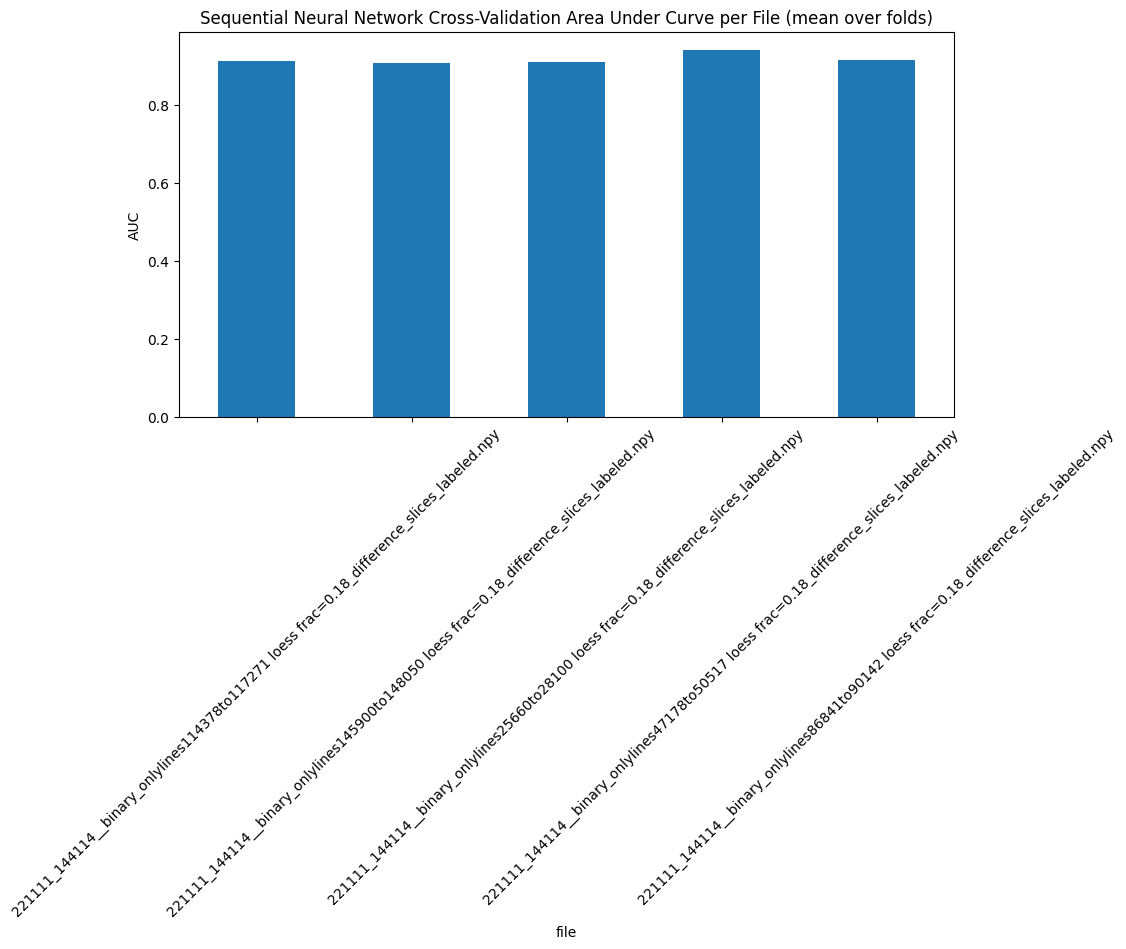

In [6]:
# Summarize results
df = pd.DataFrame(results)
print(df.groupby("file")[["accuracy", "precision", "recall", "f1", "roc_auc"]].mean())

# Optional: plot AUC per file
df.groupby("file")["roc_auc"].mean().plot.bar(rot=45, figsize=(10, 5))
plt.title("Sequential Neural Network Cross-Validation Area Under Curve per File (mean over folds)")
plt.ylabel("AUC")
plt.tight_layout()
plt.show()

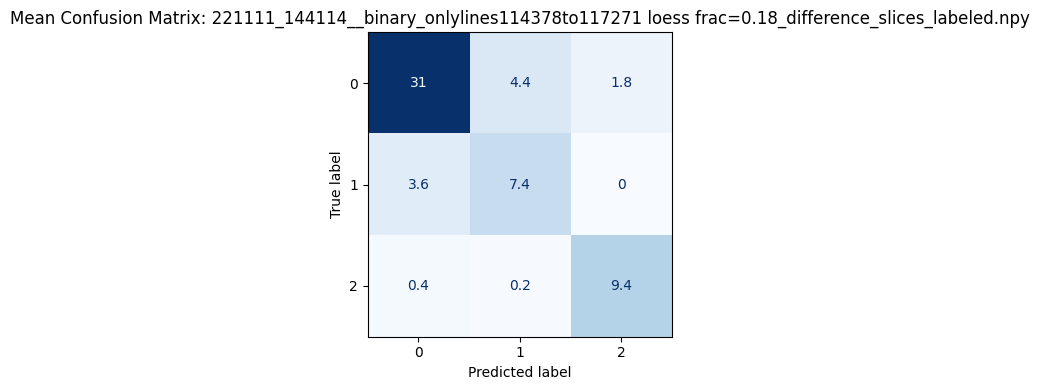

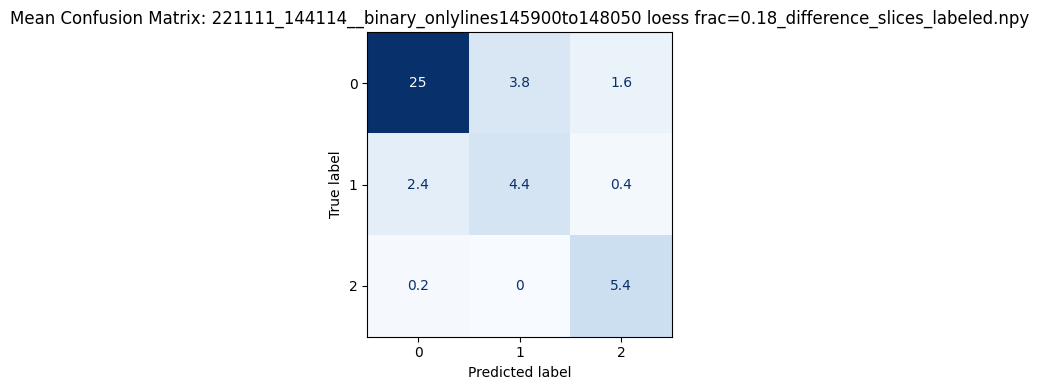

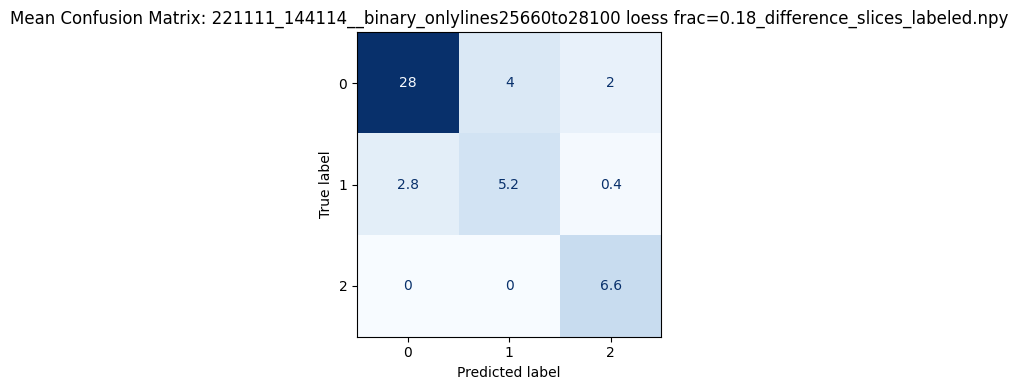

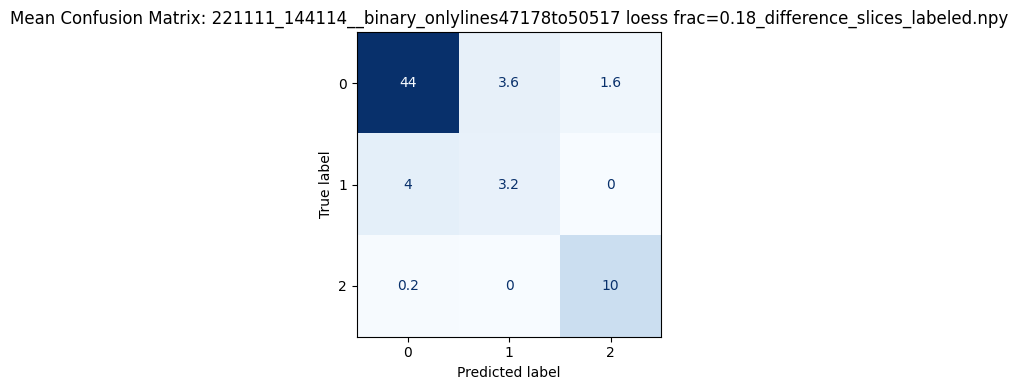

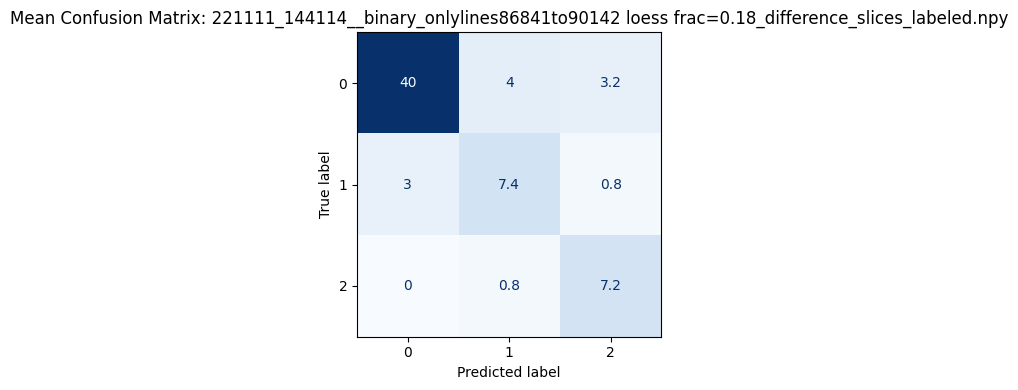

: 

In [ ]:
# Show confusion matrix for each file (mean over folds)
from sklearn.metrics import ConfusionMatrixDisplay

for file in df["file"].unique():
    cms = [np.array(row) for row in df[df["file"] == file]["confusion_matrix"]]
    # Find the largest shape
    max_dim = max(cm.shape[0] for cm in cms)
    # Pad all confusion matrices to max_dim x max_dim
    padded = []
    for cm in cms:
        pad_width = ((0, max_dim - cm.shape[0]), (0, max_dim - cm.shape[1]))
        padded.append(np.pad(cm, pad_width, mode='constant'))
    mean_cm = np.mean(padded, axis=0)
    display_labels = [str(l) for l in range(max_dim)]
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(mean_cm, display_labels=display_labels)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    plt.title(f"Mean Confusion Matrix: {file}")
    plt.tight_layout()
    plt.show()